# Proyek Analisis Data: Bike-Sharing
- **Nama:** Mia
- **Email:** mia3letters@gmail.com
- **ID Dicoding:** miyyakk

## Menentukan Pertanyaan Bisnis

- bagaimana pola penggunaan sepeda berdasarkan musim?
- bagaimana pengaruh cuaca terhadap jumlah penyawaan sepeda?
- bagaimana tren jumlah penyewaan sepeda berdasarkan jam operasional setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile

## Data Wrangling

### Gathering Data

In [2]:
#download dataset dari gdrive
gdown.download(f'https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ', 'Bike-sharing-dataset.zip')

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100%|██████████| 280k/280k [00:00<00:00, 36.2MB/s]


'Bike-sharing-dataset.zip'

In [3]:
# Extract file zip
content = 'Bike-sharing-dataset.zip'
zip = zipfile.ZipFile(content, 'r')
zip.extractall('data/')
zip.close()

### Loading Data

In [4]:
#membaca dataset
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

**Insight:**
- setelah data diekspor dari zip, data dibaca dengan library panda

### Assessing Data

In [5]:
# melihat tipe data, shape dan nama kolom
print(df_day.info())
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- DataFrame df_day berisi 731 baris dan 16 kolom, menyimpan data harian seperti suhu, kelembaban, dan jumlah pengguna selama sekitar 2 tahun. Sedangkan df_hour berisi 17.379 baris dan 17 kolom, menyajikan data yang lebih teliti per jam dalam periode yang sama, memungkinkan analisis lebih detail berdasarkan waktu.

In [6]:
# statistik summary
df_day.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset ini mencatat aktivitas per jam dengan rata-rata **189 pengguna** dan maksimum **977 pengguna** per jam, dengan faktor cuaca, seperti suhu rata-rata dan kelembaban, serta variabilitas jumlah pengguna di hari libur dan hari kerja.
- Dataset harian ini menunjukkan bahwa rata-rata **4.504 pengguna** terdaftar per hari, dengan maksimum **8.714**. Cuaca memiliki dampak signifikan, sementara variabilitas jumlah pengguna terlihat berdasarkan faktor hari kerja, libur, dan cuaca.

### Cleaning Data

In [8]:
# cek missing values dari masing-masing dataset
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# cek data duplikat
df_day.duplicated().sum()
df_hour.duplicated().sum()

0

**Insight:**
- setelah dilakukan pengecekan, tidak ada missing value dari kedua data csv
- setelah di cek, tidak ada data duplikat dari kedua data csv

#### data cleaning : dataset day

In [10]:
# me-rename semua kolom yang masih singkatan di data set day
df_day.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime'
                    }, inplace=True)

# Membuat awal kata tiap kolom kapital
df_day.columns = df_day.columns.str.title()

In [ ]:
# merubah date time data type dari objek menjadi datetime
df_day['Datetime'] = pd.to_datetime(df_day['Datetime'])
df_day.set_index('Datetime', inplace=True)

In [11]:
# cek apakah sudah terganti untuk nama, tipe data dan kapitalisasi
df_day.head()

,Instant,Datetime,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### data cleaning : dataset hour

In [12]:
# me-rename semua kolom yang masih singkatan di data set hour
df_hour.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime',
                    'hr':'Hour'
                    }, inplace=True)

# Membuat awal kata tiap kolom kapital
df_hour.columns = df_hour.columns.str.title()

In [ ]:
df_hour.head()

,Instant,Datetime,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# pemetaan musim dari numerik menjadi masing masing nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['Season'] = df_day['Season'].replace(season_mapping)

# pemetaan cuaca dari numerik menjadi masing masing nama cuaca
weather_mapping = {1: 'Clear, Few clouds',
                   2: 'Mist + Cloudy',
                   3: 'Light Snow, Light Rain',
                   4: 'Heavy Rain, Snow'}

df_day['Weathersit'] = df_day['Weathersit'].replace(weather_mapping)

# memastikan apakah sudah terganti
print(df_day[['Season', 'Weathersit']].head())


   Season         Weathersit
0  Spring      Mist + Cloudy
1  Spring      Mist + Cloudy
2  Spring  Clear, Few clouds
3  Spring  Clear, Few clouds
4  Spring  Clear, Few clouds


**Insight:**
- pergantian indeks musim dan cuaca menjadi kategori deskriptif
- pemetaan berhasil dilakukan

## Exploratory Data Analysis (EDA)

In [14]:
# menampilkan pengguna bike sharing berdasarkan musim
df_day.groupby(by="Season").Count.sum().sort_values(ascending=False).reset_index().head(10)

,Season,Count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


**Insight:**
- pengguna paling banyak di musim **gugur**
- pengguna paling sedikit di musim **semi**

In [15]:
# statistik ringaksan untuk peminjam, suhu dan kelembapan
rentals_summary = df_day['Count'].describe()
temp_summary = df_day['Temp'].describe()
hum_summary = df_day['Humidity'].describe()

# Outputnya
print("Rentals Summary:\n", rentals_summary)
print("\nTemperature Summary:\n", temp_summary)
print("\nHumidity Summary:\n", hum_summary)


Rentals Summary:
 count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: Count, dtype: float64

Temperature Summary:
 count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: Temp, dtype: float64

Humidity Summary:
 count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: Humidity, dtype: float64


**Insight:**
- Rata-rata jumlah penyewaan sepeda per hari adalah **4.504**, dengan penyewaan tertinggi mencapai 8.714 dan terendah hanya 22, menunjukkan variasi besar dalam penggunaan sepeda. Suhu rata-rata berada di sekitar **49%** dan kelembaban rata-rata **63%**, dengan keduanya menunjukkan distribusi yang relatif normal.

In [16]:
# pengelompokkan berdasar musim dan statistik ringkasannya
season_stats = df_day.groupby('Season')['Count'].describe()
print("\nSeason-wise Rentals Summary:\n", season_stats)



Season-wise Rentals Summary:
         count         mean          std     min     25%     50%      75%  \
Season                                                                     
Fall    188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
Spring  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
Summer  184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
Winter  178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
Season          
Fall    8714.0  
Spring  7836.0  
Summer  8362.0  
Winter  8555.0  


**Insight:**

- Musim Fall memiliki rata-rata penyewaan tertinggi, yaitu **5.644**
- Musim Spring memiliki rata-rata penyewaan terendah, yaitu **2.604**
- Summer dan Winter menunjukkan penyewaan rata-rata yang hampir sebanding, masing-masing **4.992** dan **4.728**

In [17]:
# pengelompokkan berdasarkan musim dan statistik ringkasannya
weather_stats = df_day.groupby('Weathersit')['Count'].describe()
print("\nWeather-wise Rentals Summary:\n", weather_stats)



Weather-wise Rentals Summary:
                         count         mean          std    min     25%  \
Weathersit                                                               
Clear, Few clouds       463.0  4876.786177  1879.483989  431.0  3636.5   
Light Snow, Light Rain   21.0  1803.285714  1240.284449   22.0   705.0   
Mist + Cloudy           247.0  4035.862348  1809.109918  605.0  2674.5   

                           50%     75%     max  
Weathersit                                      
Clear, Few clouds       4844.0  6458.5  8714.0  
Light Snow, Light Rain  1817.0  2424.0  4639.0  
Mist + Cloudy           4040.0  5257.5  8362.0  


**Insight:**
- Kondisi cuaca cerah, sedikit awan memiliki rata-rata penyewaan tertinggi, yaitu **4.876**
- Penyewaan terendah terjadi pada kondisi salju ringan, hujan ringan, dengan rata-rata **1.803**
- Kondisi berkabut dan berawan menunjukkan rata-rata penyewaan **4.035**


## Visualization & Explanatory Analysis

### Pertanyaan 1 : bagaimana penggunaan sepeda berdasarkan musim?


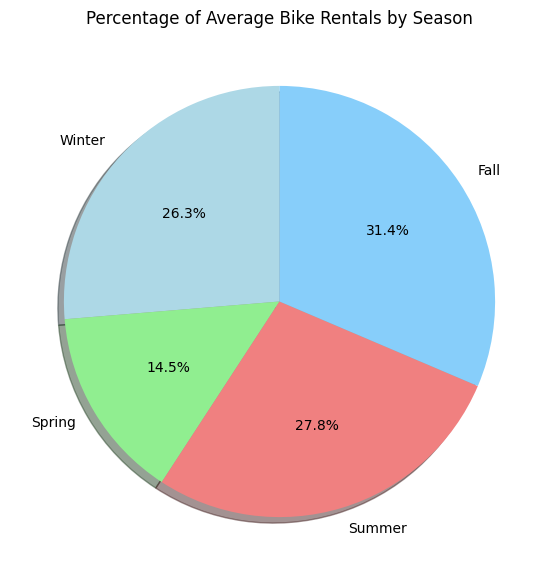

In [18]:
# pengelompokkan berdasar musim dan menghitung rata rata penggunanya
season_avg = df_day.groupby('Season')['Count'].mean()
season_avg = season_avg[['Winter', 'Spring', 'Summer', 'Fall']]

# Plotting output menggunakan pie chart
plt.figure(figsize=(7, 7))
plt.pie(season_avg, labels=season_avg.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], startangle=90, shadow=True)
plt.title("Percentage of Average Bike Rentals by Season")
plt.show()


**Insight:**
- Penyewaan sepeda tertinggi terjadi pada musim gugur (31,4%), diikuti oleh musim panas (27,8%) dan musim dingin (26,3%), sementara musim semi mencatat jumlah penyewaan terendah (14,5%).
-  Ini menunjukkan bahwa faktor musiman memengaruhi permintaan penyewaan sepeda, di mana musim gugur dan musim panas cenderung lebih ramai, mungkin karena cuaca yang lebih nyaman untuk bersepeda.

### bagaimana cuaca mempengaruhi peminjaman sepeda


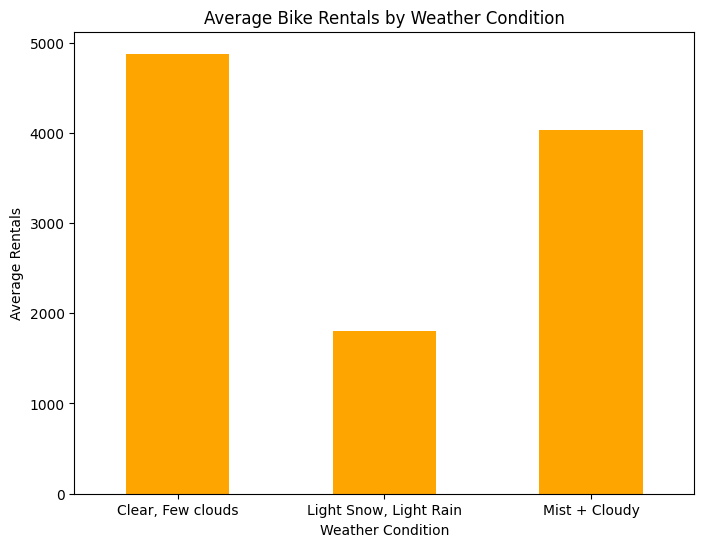

In [19]:
# pengelompokkan berdasarkan cuaca dan menghitung rata rata pengguna
weather_avg = df_day.groupby('Weathersit')['Count'].mean()

# membuat stacked bar chart
plt.figure(figsize=(8, 6))
weather_avg.plot(kind='bar', color='orange')

# Title and labels
plt.title("Average Bike Rentals by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Rentals")
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah atau dengan awan tipis, dengan jumlah penyewaan lebih dari 4.500. Cuaca berkabut dan mendung memiliki tingkat penyewaan kedua tertinggi, sedangkan kondisi hujan ringan atau salju mencatat penyewaan terendah.
- Cuaca memainkan peran penting dalam keputusan konsumen untuk menyewa sepeda, di mana cuaca cerah lebih menarik bagi penyewa.

### Pertanyaan 3: melihat trend peminjaman antara weekday vs weekend

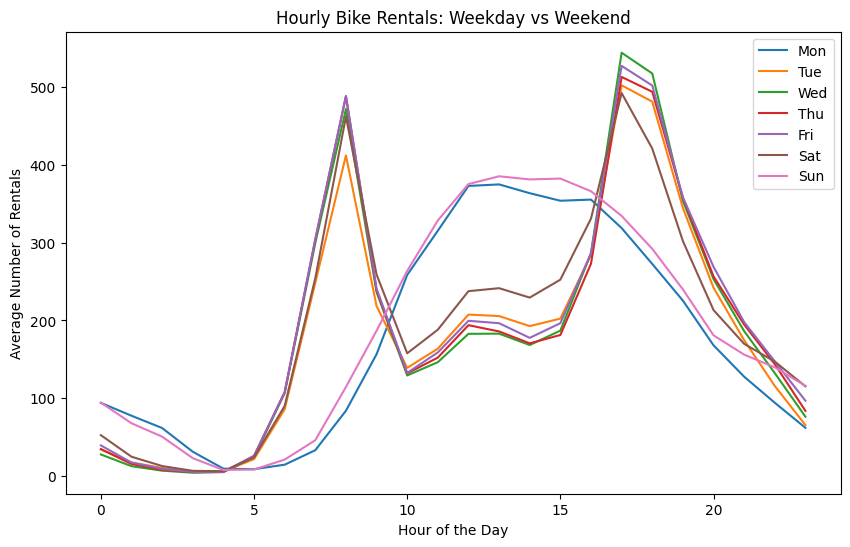

In [20]:
# membuat pivot tabel untuk jam dan hari kerja
hourly_trend = df_hour.pivot_table(values='Count', index='Hour', columns='Weekday', aggfunc='mean')

# Plot line plot untuk pengguna di tiap hari dan jamnya
hourly_trend.plot(kind='line', figsize=(10, 6), title="Hourly Bike Rentals: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Rentals")
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

**Insight:**
- Penyewaan sepeda cenderung memuncak dua kali sehari, yaitu pada pukul 8 pagi dan 5 sore, baik pada hari kerja maupun akhir pekan. Namun, akhir pekan memiliki jumlah penyewaan lebih tinggi di siang hari, sementara hari kerja memiliki pola puncak yang lebih tajam.
-Ini menunjukkan perilaku bersepeda terkait dengan aktivitas rutin sehari-hari seperti berangkat dan pulang kerja, serta penggunaan yang lebih santai di akhir pekan.

## Conclusion

- **Pertanyaan 1:** Ini menunjukkan bahwa faktor musiman memengaruhi permintaan penyewaan sepeda, di mana musim gugur dan musim panas cenderung lebih ramai, mungkin karena cuaca yang lebih nyaman untuk bersepeda.
-**Pertanyaan 2:** Cuaca cerah atau sedikit berawan sangat mendukung aktivitas penyewaan sepeda, dengan jumlah penyewaan yang signifikan dibandingkan kondisi hujan ringan atau salju. Faktor cuaca sangat menentukan jumlah pengguna yang nyaman untuk bersepeda, di mana penyewaan turun drastis saat cuaca kurang bersahabat.
- **Pertanyaan 3:** Pola penyewaan sepeda menunjukkan bahwa hari kerja memiliki puncak yang tajam di pagi dan sore hari, yang bertepatan dengan jam berangkat dan pulang kerja. Sementara di akhir pekan, penyewaan lebih merata di sepanjang siang hingga sore hari, menunjukkan bahwa sepeda digunakan lebih untuk rekreasi atau aktivitas santai.

In [22]:
df_day.to_csv("data_daily.csv", index=False)
df_hour.to_csv("data_hourly.csv", index=False)